In [15]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [16]:
fake = np.load('./fake.npz')
real = np.load('./real.npz')

In [17]:
x_array_fake = fake['x']
x_array_real= real['x']
y_array_fake = fake['y']
y_array_real = real['y']

In [69]:
x_array_real[0]

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [3.359e-04, 3.683e-02, 7.349e-02, ..., 5.215e-05, 8.821e-05,
        6.813e-05],
       [6.535e-03, 9.628e-03, 2.792e-02, ..., 1.311e-06, 2.420e-05,
        2.646e-05],
       [2.278e-02, 1.903e-02, 5.807e-02, ..., 4.053e-06, 1.913e-05,
        2.331e-05]], dtype=float16)

In [6]:
x*255

NameError: name 'x' is not defined

In [18]:
import librosa
x = (x_array_fake[5]*255).astype(np.uint8)
spectral_contrast = librosa.feature.spectral_contrast(S=x)[0]
spectral_flatness = librosa.feature.spectral_flatness(S=x)[0]
spectral_rolloff = librosa.feature.spectral_rolloff(S=x)[0]
df_contrast = pd.DataFrame(columns=['contrast_{}'.format(i) for i in range(spectral_contrast.shape[0])])
df_flatness = pd.DataFrame(columns=['flatness_{}'.format(i) for i in range(101)])
df_rolloff = pd.DataFrame( columns=['rolloff_{}'.format(i) for i in range(101)])
combined_df = pd.concat([df_contrast, df_flatness, df_rolloff], axis=1)

# Display the plot
combined_df

C:\Users\20112\AppData\Local\Temp\ipykernel_22692\1755959639.py:2: RuntimeWarning: overflow encountered in multiply
  x = (x_array_fake[5]*255).astype(np.uint8)
C:\Users\20112\AppData\Local\Temp\ipykernel_22692\1755959639.py:2: RuntimeWarning: invalid value encountered in cast
  x = (x_array_fake[5]*255).astype(np.uint8)


Empty DataFrame
Columns: [contrast_0, contrast_1, contrast_2, contrast_3, contrast_4, contrast_5, contrast_6, contrast_7, contrast_8, contrast_9, contrast_10, contrast_11, contrast_12, contrast_13, contrast_14, contrast_15, contrast_16, contrast_17, contrast_18, contrast_19, contrast_20, contrast_21, contrast_22, contrast_23, contrast_24, contrast_25, contrast_26, contrast_27, contrast_28, contrast_29, contrast_30, contrast_31, contrast_32, contrast_33, contrast_34, contrast_35, contrast_36, contrast_37, contrast_38, contrast_39, contrast_40, contrast_41, contrast_42, contrast_43, contrast_44, contrast_45, contrast_46, contrast_47, contrast_48, contrast_49, contrast_50, contrast_51, contrast_52, contrast_53, contrast_54, contrast_55, contrast_56, contrast_57, contrast_58, contrast_59, contrast_60, contrast_61, contrast_62, contrast_63, contrast_64, contrast_65, contrast_66, contrast_67, contrast_68, contrast_69, contrast_70, contrast_71, contrast_72, contrast_73, contrast_74, contrast_75, contrast_76, contrast_77, contrast_78, contrast_79, contrast_80, contrast_81, contrast_82, contrast_83, contrast_84, contrast_85, contrast_86, contrast_87, contrast_88, contrast_89, contrast_90, contrast_91, contrast_92, contrast_93, contrast_94, contrast_95, contrast_96, contrast_97, contrast_98, contrast_99, ...]
Index: []

[0 rows x 303 columns]

In [74]:
x_array_fake.mean()

inf

In [19]:
def Wrangle ():
   # contrast_features = []
    flatness_features = []
    rolloff_features = []
    all_labels = []
    for x in x_array_fake:
        x[np.isinf(x)] = 0
        x = (x*255).astype(np.uint8)
        #spectral_contrast = librosa.feature.spectral_contrast(S=x)[0].reshape(1,-1)[0]
        spectral_flatness = librosa.feature.spectral_flatness(S=x)[0].reshape(1,-1)[0]
        spectral_rolloff = librosa.feature.spectral_rolloff(S=x)[0].reshape(1,-1)[0]
        # Append the extracted features and label to the respective lists
       # contrast_features.append(spectral_contrast)
        flatness_features.append(spectral_flatness)
        rolloff_features.append(spectral_rolloff)
        all_labels.append("fake")
    for x in x_array_real:
        x[np.isinf(x)] = 0
        x = (x*255).astype(np.uint8)
      #  spectral_contrast = librosa.feature.spectral_contrast(S=x)[0].reshape(1,-1)[0]
        spectral_flatness = librosa.feature.spectral_flatness(S=x)[0].reshape(1,-1)[0]
        spectral_rolloff = librosa.feature.spectral_rolloff(S=x)[0].reshape(1,-1)[0]
        # Append the extracted features and label to the respective lists
        #contrast_features.append(spectral_contrast)
        flatness_features.append(spectral_flatness)
        rolloff_features.append(spectral_rolloff)
        all_labels.append("real")
      
   # df_contrast = pd.DataFrame(contrast_features,columns=['contrast_{}'.format(i) for i in range(101)])
    df_flatness = pd.DataFrame(flatness_features,columns=['flatness_{}'.format(i) for i in range(101)])
    df_rolloff = pd.DataFrame( rolloff_features,columns=['rolloff_{}'.format(i) for i in range(101)])
    df = pd.concat([ df_flatness, df_rolloff], axis=1)
    df['class'] = all_labels
    return df

df = Wrangle()
df


C:\Users\20112\AppData\Local\Temp\ipykernel_22692\1672288894.py:8: RuntimeWarning: overflow encountered in multiply
  x = (x*255).astype(np.uint8)
C:\Users\20112\AppData\Local\Temp\ipykernel_22692\1672288894.py:8: RuntimeWarning: invalid value encountered in cast
  x = (x*255).astype(np.uint8)
C:\Users\20112\AppData\Local\Temp\ipykernel_22692\1672288894.py:19: RuntimeWarning: overflow encountered in multiply
  x = (x*255).astype(np.uint8)
C:\Users\20112\AppData\Local\Temp\ipykernel_22692\1672288894.py:19: RuntimeWarning: invalid value encountered in cast
  x = (x*255).astype(np.uint8)


flatness_0    flatness_1    flatness_2    flatness_3    flatness_4  \
0       0.006719  2.173187e-02  1.187815e-02  8.291497e-03  7.054932e-03   
1       0.000603  1.925704e-02  1.986024e-02  2.568453e-02  2.978816e-02   
2       0.000003  1.587916e-10  1.060511e-11  6.589408e-11  4.817666e-10   
3       0.000084  1.060254e-06  1.679609e-08  3.995067e-08  1.063081e-05   
4       0.003509  1.812417e-02  3.582247e-03  1.635076e-03  4.693378e-04   
...          ...           ...           ...           ...           ...   
1495    0.000014  6.238636e-08  7.021932e-10  9.201626e-10  6.427301e-08   
1496    0.000011  1.371121e-09  5.754190e-11  3.367404e-11  2.105086e-10   
1497    0.000119  8.339026e-03  1.076602e-02  1.388105e-02  7.554508e-03   
1498    0.000754  1.259819e-02  1.370482e-02  2.316705e-02  2.316028e-02   
1499    0.002156  5.110178e-02  5.178501e-02  4.394753e-02  3.048716e-02   

        flatness_5    flatness_6    flatness_7    flatness_8    flatness_9  \
0     2.307115e-03  6.174121e-04  2.782226e-04  4.044219e-04  4.721870e-04   
1     1.847278e-02  3.815851e-03  3.003629e-03  2.802304e-03  3.357569e-03   
2     9.161092e-09  1.051576e-09  9.333728e-11  4.880986e-11  2.192393e-10   
3     1.950935e-04  2.193660e-05  2.853927e-08  2.075343e-09  9.230815e-10   
4     1.258318e-04  2.506382e-05  7.760733e-06  6.086821e-06  9.685404e-06   
...            ...           ...           ...           ...           ...   
1495  2.027638e-05  1.352311e-06  7.227141e-10  8.107817e-11  4.972193e-11   
1496  2.867774e-08  1.367994e-08  1.092453e-10  1.559488e-11  6.515807e-12   
1497  2.813497e-03  2.682017e-04  7.221652e-05  5.879325e-05  8.837002e-05   
1498  1.240513e-02  2.100219e-03  9.564091e-04  8.415435e-04  1.177393e-03   
1499  3.140227e-02  1.581035e-02  1.294554e-02  1.102013e-02  1.093913e-02   

      ...   rolloff_92   rolloff_93   rolloff_94   rolloff_95   rolloff_96  \
0     ...  4168.189785  4195.793691  4195.793691  4245.480721  4239.959940   
1     ...  2246.957937  2285.603405  2357.373560  2368.415123  2384.977466   
2     ...  4306.209314  4311.730095  4289.646970  4322.771657  4549.123686   
3     ...  3925.275413  3936.316975  3941.837757  3919.754632  3881.109164   
4     ...  4604.331497  4665.060090  4709.226340  4714.747121  4841.725088   
...   ...          ...          ...          ...          ...          ...   
1495  ...  2953.617927  2920.493240  2865.285428  2920.493240  3069.554331   
1496  ...  2307.686530  2285.603405  2373.935904  2401.539810  2511.955433   
1497  ...  4311.730095  4339.334001  4339.334001  4339.334001  4361.417126   
1498  ...  4576.727591  4587.769154  4549.123686  4543.602904  4543.602904   
1499  ...  2280.082624  2296.644967  2307.686530  2324.248873  2307.686530   

       rolloff_97   rolloff_98   rolloff_99  rolloff_100  class  
0     4212.356034  4278.605408  4389.021032  4466.311968   fake  
1     2329.769654  2263.520280  2191.750125  2136.542313   fake  
2     4753.392589  4979.744617  5073.597897  4985.265398   fake  
3     3864.546820  3649.236355  3770.693540  3770.693540   fake  
4     4869.328993  4869.328993  5007.348523  5029.431647   fake  
...           ...          ...          ...          ...    ...  
1495  2953.617927  2898.410115  2970.180270  2997.784176   real  
1496  2517.476214  2832.160741  2964.659489  2478.830746   real  
1497  4333.813220  4322.771657  4355.896345  4411.104156   real  
1498  4532.561342  4482.874311  4681.622434  4747.871808   real  
1499  2313.207311  2296.644967  2291.124186  2296.644967   real  

[1500 rows x 203 columns]

In [79]:
df = df.sample(frac=1).reset_index(drop=True)
df.corr()

C:\Users\20112\AppData\Local\Temp\ipykernel_9240\1630999460.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


flatness_0  flatness_1  flatness_2  flatness_3  flatness_4  \
flatness_0     1.000000    0.698648    0.488959    0.304966    0.224250   
flatness_1     0.698648    1.000000    0.826844    0.649702    0.539504   
flatness_2     0.488959    0.826844    1.000000    0.938509    0.854586   
flatness_3     0.304966    0.649702    0.938509    1.000000    0.947321   
flatness_4     0.224250    0.539504    0.854586    0.947321    1.000000   
...                 ...         ...         ...         ...         ...   
rolloff_96    -0.017189   -0.027437   -0.007614    0.004295   -0.002080   
rolloff_97    -0.017462   -0.026379   -0.006771    0.005269   -0.000879   
rolloff_98    -0.017248   -0.028386   -0.005890    0.006614    0.001322   
rolloff_99    -0.020773   -0.032145   -0.010817    0.002295   -0.002482   
rolloff_100   -0.015330   -0.028777   -0.007062    0.005783    0.003785   

             flatness_5  flatness_6  flatness_7  flatness_8  flatness_9  ...  \
flatness_0     0.187606    0.254688    0.259990    0.247846    0.256517  ...   
flatness_1     0.440135    0.403902    0.368440    0.369245    0.380796  ...   
flatness_2     0.740496    0.645412    0.597936    0.599244    0.615153  ...   
flatness_3     0.837041    0.722343    0.667398    0.661975    0.672051  ...   
flatness_4     0.926270    0.815747    0.755354    0.720626    0.714395  ...   
...                 ...         ...         ...         ...         ...  ...   
rolloff_96    -0.015308   -0.016966   -0.008434   -0.016515   -0.015210  ...   
rolloff_97    -0.014350   -0.015927   -0.007613   -0.015320   -0.013814  ...   
rolloff_98    -0.012034   -0.012273   -0.003657   -0.010304   -0.007983  ...   
rolloff_99    -0.013700   -0.012632   -0.003766   -0.009675   -0.008062  ...   
rolloff_100   -0.004732   -0.000516    0.008639    0.000491    0.000665  ...   

             rolloff_91  rolloff_92  rolloff_93  rolloff_94  rolloff_95  \
flatness_0    -0.001947    0.000084   -0.007178   -0.010593   -0.013852   
flatness_1    -0.011870   -0.008781   -0.020544   -0.021242   -0.024630   
flatness_2     0.008268    0.009623    0.000175   -0.000930   -0.003607   
flatness_3     0.017899    0.018696    0.010842    0.010286    0.008121   
flatness_4     0.009979    0.009935    0.003869    0.002527    0.000959   
...                 ...         ...         ...         ...         ...   
rolloff_96     0.993463    0.992701    0.994296    0.996232    0.998847   
rolloff_97     0.993145    0.992632    0.994581    0.996397    0.997910   
rolloff_98     0.992227    0.991980    0.993869    0.994959    0.996217   
rolloff_99     0.992212    0.990740    0.992474    0.994347    0.996595   
rolloff_100    0.990869    0.989416    0.990670    0.992331    0.994671   

             rolloff_96  rolloff_97  rolloff_98  rolloff_99  rolloff_100  
flatness_0    -0.017189   -0.017462   -0.017248   -0.020773    -0.015330  
flatness_1    -0.027437   -0.026379   -0.028386   -0.032145    -0.028777  
flatness_2    -0.007614   -0.006771   -0.005890   -0.010817    -0.007062  
flatness_3     0.004295    0.005269    0.006614    0.002295     0.005783  
flatness_4    -0.002080   -0.000879    0.001322   -0.002482     0.003785  
...                 ...         ...         ...         ...          ...  
rolloff_96     1.000000    0.999311    0.997571    0.997199     0.994770  
rolloff_97     0.999311    1.000000    0.998375    0.997218     0.994319  
rolloff_98     0.997571    0.998375    1.000000    0.997220     0.993395  
rolloff_99     0.997199    0.997218    0.997220    1.000000     0.997758  
rolloff_100    0.994770    0.994319    0.993395    0.997758     1.000000  

[202 rows x 202 columns]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

C:\Users\20112\AppData\Local\Temp\ipykernel_6728\2133792209.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


KeyboardInterrupt: 

In [22]:
expanded_Y = np.repeat(y_array_real[5], repeats=4)
indices = np.where(expanded_Y == 1)[0]
x_array_real[5].shape


(1998, 101)

In [23]:
# Convert 1D array to 2D array
width = 101
num_samples = len(y_array_real[15])
new_shape = (num_samples, width)

# Create a 2D array where each 1 is represented as an array with all elements being 1,
# and each 0 is represented as an array with all elements being 0
array_2d = np.zeros(new_shape)
array_2d[np.arange(num_samples), :] = y_array_real[7][:, None] * np.ones((1, width))

C:\Users\20112\AppData\Local\Temp\ipykernel_22692\2905462045.py:2: RuntimeWarning: overflow encountered in multiply
  plt.imshow((x_array_real[15][0:indices[0]]*255).astype(np.uint8).T, aspect='auto')
C:\Users\20112\AppData\Local\Temp\ipykernel_22692\2905462045.py:2: RuntimeWarning: invalid value encountered in cast
  plt.imshow((x_array_real[15][0:indices[0]]*255).astype(np.uint8).T, aspect='auto')


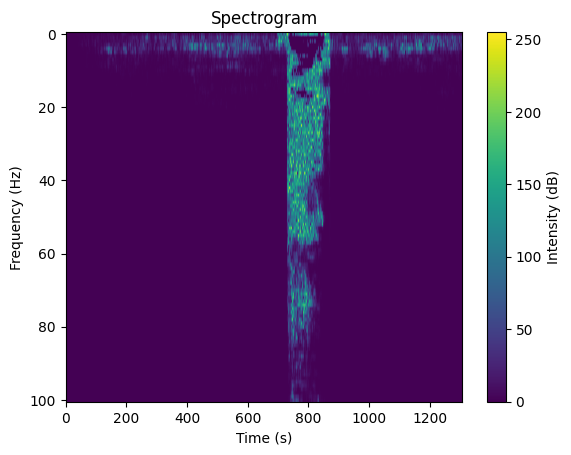

C:\Users\20112\AppData\Local\Temp\ipykernel_22692\2905462045.py:9: RuntimeWarning: overflow encountered in multiply
  plt.imshow((x_array_fake[8]*255).astype(np.uint8).T, aspect='auto', origin='lower')
C:\Users\20112\AppData\Local\Temp\ipykernel_22692\2905462045.py:9: RuntimeWarning: invalid value encountered in cast
  plt.imshow((x_array_fake[8]*255).astype(np.uint8).T, aspect='auto', origin='lower')


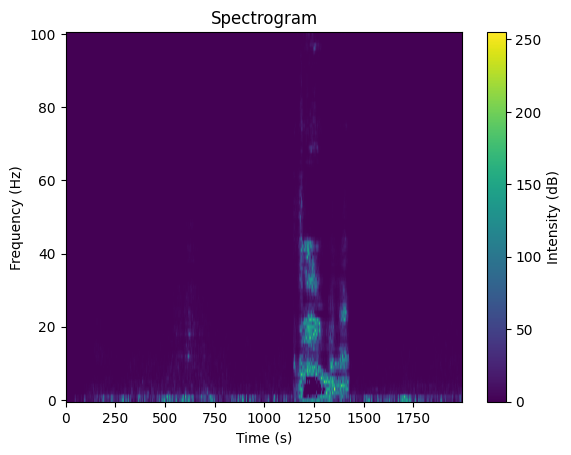

In [24]:
# Compute and plot the spectrogram
plt.imshow((x_array_real[15][0:indices[0]]*255).astype(np.uint8).T, aspect='auto')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar(label='Intensity (dB)')
plt.show()

plt.imshow((x_array_fake[8]*255).astype(np.uint8).T, aspect='auto', origin='lower')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.colorbar(label='Intensity (dB)')
plt.show()

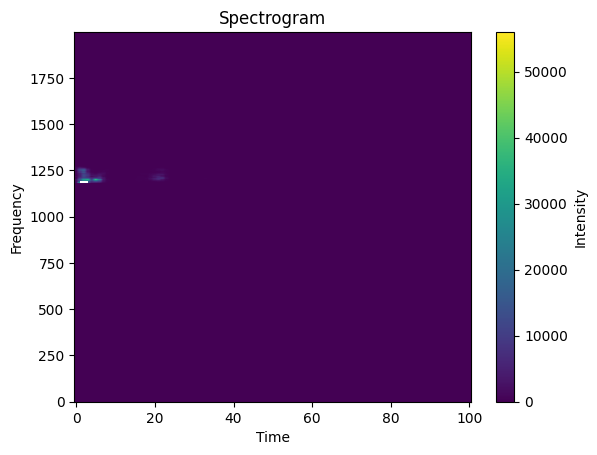

In [ ]:
df = pd.DataFrame()


In [155]:
df.isin([np.inf, -np.inf]).sum().sum()

0

In [ ]:
for item in y_array_real:
    if item.sum() != 0:
        print(item.sum())
    

99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
99
9

In [25]:
X = df.drop(columns='class')
y = df['class']
y.shape

(1500,)

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier


pca = PCA(n_components=199)

model = make_pipeline(pca,RandomForestClassifier(random_state=42,max_depth=21,n_estimators=51))
model2 = make_pipeline(pca,GradientBoostingClassifier(random_state=42,max_depth=21,n_estimators=51))
# model = (RandomForestClassifier(random_state=42))

In [27]:
from sklearn.model_selection import train_test_split # for splitting data 
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=25,train_size=.8)

In [159]:
x_train.shape
x_test

flatness_0    flatness_1    flatness_2    flatness_3    flatness_4  \
1495    0.000014  6.238636e-08  7.021932e-10  9.201626e-10  6.427301e-08   
657     0.000624  2.065050e-02  2.124361e-02  2.759115e-02  2.776525e-02   
1033    0.000100  2.575366e-03  3.447587e-03  5.143229e-03  8.165207e-03   
415     0.000075  3.376033e-06  2.371988e-08  5.372347e-08  1.935187e-05   
1379    0.000010  6.819156e-09  1.683952e-10  2.628279e-10  4.169035e-09   
...          ...           ...           ...           ...           ...   
427     0.000041  1.941689e-07  3.655607e-10  7.986327e-10  1.163807e-07   
671     0.000011  5.960356e-08  4.052912e-10  6.813656e-10  5.137209e-08   
1220    0.000407  1.657116e-02  2.231900e-02  2.124886e-02  2.709209e-02   
1374    0.012764  2.320317e-02  6.151447e-03  2.122999e-03  1.201792e-03   
1121    0.008855  3.855872e-02  3.825301e-02  6.547297e-02  6.229901e-02   

        flatness_5    flatness_6    flatness_7    flatness_8    flatness_9  \
1495  2.027638e-05  1.352311e-06  7.227141e-10  8.107817e-11  4.972193e-11   
657   1.936283e-02  4.285038e-03  3.552094e-03  2.994502e-03  4.020552e-03   
1033  1.640715e-02  1.650941e-03  3.544777e-04  2.047839e-04  2.845317e-04   
415   5.008667e-04  3.756908e-05  1.110543e-07  5.364189e-09  6.206157e-10   
1379  6.613947e-07  9.108268e-08  2.817519e-10  2.156100e-11  2.702293e-11   
...            ...           ...           ...           ...           ...   
427   4.071443e-05  1.383884e-06  4.415373e-10  1.154647e-10  5.245249e-11   
671   9.365128e-06  5.493788e-07  1.431708e-09  1.103475e-10  6.511052e-11   
1220  9.852341e-03  1.326973e-03  3.628065e-04  2.161011e-04  2.322317e-04   
1374  2.972085e-04  7.751346e-05  1.982419e-05  1.549788e-05  1.508260e-05   
1121  9.219879e-02  8.815892e-02  5.187224e-02  5.777120e-02  6.263009e-02   

      ...   rolloff_91   rolloff_92   rolloff_93   rolloff_94   rolloff_95  \
1495  ...  2920.493240  2953.617927  2920.493240  2865.285428  2920.493240   
657   ...  1418.840761  1507.173260  1534.777166  1617.588883  1617.588883   
1033  ...  3721.006510  3588.507762  3715.485729  3616.111668  3676.840260   
415   ...  7033.475213  7033.475213  7038.995994  7038.995994  7038.995994   
1379  ...  6967.225839  7016.912869  7033.475213  7000.350526  7000.350526   
...   ...          ...          ...          ...          ...          ...   
427   ...  1258.738107  1258.738107  1231.134201  1231.134201  1214.571858   
671   ...  7557.949424  7563.470205  7613.157236  7673.885829  7673.885829   
1220  ...   629.369054   695.618428   596.244367   596.244367   612.806710   
1374  ...  4030.170255  4090.898848  3991.524787  3991.524787  4008.087131   
1121  ...  2843.202303  2854.243866  2826.639960  2892.889334  2892.889334   

       rolloff_96   rolloff_97   rolloff_98   rolloff_99  rolloff_100  
1495  3069.554331  2953.617927  2898.410115  2970.180270  2997.784176  
657   1634.151227  1573.422634  1507.173260  1440.923886  1336.029044  
1033  3632.674011  3483.612919  3478.092138  3577.466199  3594.028543  
415   7210.140210  7226.702554  7292.951928  7303.993490  7254.306460  
1379  7038.995994  7083.162243  6978.267401  7016.912869  7094.203806  
...           ...          ...          ...          ...          ...  
427   1209.051077  1198.009514  1164.884827  1258.738107  1258.738107  
671   7789.822233  7828.467702  7833.988483  7977.528793  7983.049574  
1220   535.515774   458.224837   651.452178   629.369054   507.911868  
1374  3930.796194  3853.505258  4030.170255  4024.649474  3903.192288  
1121  2832.160741  2804.556835  2876.326990  2975.701052  2981.221833  

[300 rows x 202 columns]

In [28]:
model.fit(x_train,y_train)
model2.fit(x_train,y_train)


Pipeline(steps=[('pca', PCA(n_components=199)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(max_depth=21, n_estimators=51,
                                            random_state=42))])

In [30]:
model2.score(x_test,y_test)

0.8033333333333333

In [31]:
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split

cv_acc_scores = cross_val_score(model2,X,y,cv=3,n_jobs=-1)
cv_acc_scores

array([0.76 , 0.76 , 0.772])

In [121]:

params = {
    "randomforestclassifier__n_estimators":range(45,52),
    "randomforestclassifier__max_depth":range(17,22),
    "pca__n_components":range(191,202)
}

In [122]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(
    model,
    param_grid=params,
    cv=5, # numbre of folds  in cross validation
    n_jobs=-1,
    verbose=1,
    
)

In [123]:
grid_model.fit(X,y)

Fitting 5 folds for each of 385 candidates, totalling 1925 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA(n_components=199)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(max_depth=21,
                                                               n_estimators=51,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'pca__n_components': range(191, 202),
                         'randomforestclassifier__max_depth': range(17, 22),
                         'randomforestclassifier__n_estimators': range(45, 52)},
             verbose=1)

In [124]:

cv_results = pd.DataFrame(grid_model.cv_results_).set_index("rank_test_score")
cv_results.sort_index()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
rank_test_score                                                                 
1                     1.645800      0.208789         0.022000        0.001673   
1                     1.643999      0.155760         0.034201        0.014958   
3                     1.597200      0.156091         0.024800        0.004215   
4                     1.736801      0.256654         0.037599        0.022897   
5                     1.326599      0.021950         0.020000        0.000632   
...                        ...           ...              ...             ...   
379                   1.895194      0.378651         0.037601        0.013894   
382                   1.503199      0.088056         0.030400        0.009003   
383                   1.704407      0.328289         0.029202        0.006646   
384                   1.424199      0.140088         0.021600        0.002245   
385                   1.508600      0.154138         0.023601        0.002869   

                param_pca__n_components  \
rank_test_score                           
1                                   196   
1                                   196   
3                                   201   
4                                   196   
5                                   196   
...                                 ...   
379                                 199   
382                                 198   
383                                 199   
384                                 198   
385                                 198   

                param_randomforestclassifier__max_depth  \
rank_test_score                                           
1                                                    17   
1                                                    18   
3                                                    17   
4                                                    18   
5                                                    17   
...                                                 ...   
379                                                  17   
382                                                  20   
383                                                  17   
384                                                  20   
385                                                  20   

                param_randomforestclassifier__n_estimators  \
rank_test_score                                              
1                                                       51   
1                                                       47   
3                                                       51   
4                                                       51   
5                                                       46   
...                                                    ...   
379                                                     46   
382                                                     47   
383                                                     48   
384                                                     46   
385                                                     48   

                                                            params  \
rank_test_score                                                      
1                {'pca__n_components': 196, 'randomforestclassi...   
1                {'pca__n_components': 196, 'randomforestclassi...   
3                {'pca__n_components': 201, 'randomforestclassi...   
4                {'pca__n_components': 196, 'randomforestclassi...   
5                {'pca__n_components': 196, 'randomforestclassi...   
...                                                            ...   
379              {'pca__n_components': 199, 'randomforestclassi...   
382              {'pca__n_components': 198, 'randomforestclassi...   
383              {'pca__n_components': 199, 'randomforestclassi...   
384              {'pca__n_components': 198, 'randomforestc

In [ ]:
# Plot fit time vs max_depth
plt.plot(cv_results["param_max_depth"],cv_results["mean_fit_time"])
# Label axes
plt.xlabel("Max Depth")
plt.ylabel("Mean Fit Time [seconds]")
plt.title("Training Time vs Max Depth (n_estimators=25)");

NameError: name 'cv_results' is not defined

Index(['flatness_0', 'flatness_1', 'flatness_2', 'flatness_3', 'flatness_4',
       'flatness_5', 'flatness_6', 'flatness_7', 'flatness_8', 'flatness_9',
       ...
       'rolloff_91', 'rolloff_92', 'rolloff_93', 'rolloff_94', 'rolloff_95',
       'rolloff_96', 'rolloff_97', 'rolloff_98', 'rolloff_99', 'rolloff_100'],
      dtype='object', length=202)


In [173]:
len(importances)
pca = model.named_steps['pca']

# Get the names of the original features
features = X.columns

# Get the principal component names
pca_columns = [f"PC{i+1}" for i in range(pca.n_components_)]

# Combine feature names and principal component names
all_columns = list(features) + pca_columns

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14',
 'PC15',
 'PC16',
 'PC17',
 'PC18',
 'PC19',
 'PC20',
 'PC21',
 'PC22',
 'PC23',
 'PC24',
 'PC25',
 'PC26',
 'PC27',
 'PC28',
 'PC29',
 'PC30',
 'PC31',
 'PC32',
 'PC33',
 'PC34',
 'PC35',
 'PC36',
 'PC37',
 'PC38',
 'PC39',
 'PC40',
 'PC41',
 'PC42',
 'PC43',
 'PC44',
 'PC45',
 'PC46',
 'PC47',
 'PC48',
 'PC49',
 'PC50',
 'PC51',
 'PC52',
 'PC53',
 'PC54',
 'PC55',
 'PC56',
 'PC57',
 'PC58',
 'PC59',
 'PC60',
 'PC61',
 'PC62',
 'PC63',
 'PC64',
 'PC65',
 'PC66',
 'PC67',
 'PC68',
 'PC69',
 'PC70',
 'PC71',
 'PC72',
 'PC73',
 'PC74',
 'PC75',
 'PC76',
 'PC77',
 'PC78',
 'PC79',
 'PC80',
 'PC81',
 'PC82',
 'PC83',
 'PC84',
 'PC85',
 'PC86',
 'PC87',
 'PC88',
 'PC89',
 'PC90',
 'PC91',
 'PC92',
 'PC93',
 'PC94',
 'PC95',
 'PC96',
 'PC97',
 'PC98',
 'PC99',
 'PC100',
 'PC101',
 'PC102',
 'PC103',
 'PC104',
 'PC105',
 'PC106',
 'PC107',
 'PC108',
 'PC109',
 'PC110',
 'PC111'

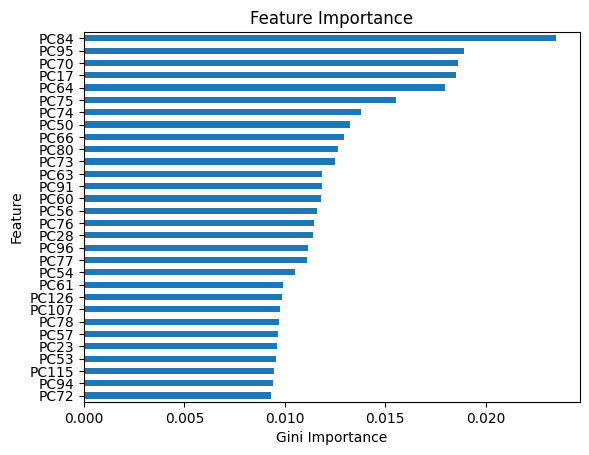

In [174]:
features = X
# Extract importances from model
importances = model.steps[-1][1].feature_importances_
# Create a series with feature names and importances
feat_imp =pd.Series(importances,index=pca_columns
)
# Plot 10 most important features
feat_imp.sort_values().tail(30).plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

# Test

In [175]:
import pickle

# Assuming 'model' is the trained machine learning model
# Save the model to a file
with open('modelINF.pkl', 'wb') as f:
    pickle.dump(model, f)

In [8]:
with open('model.pkl', 'rb') as file:
    model_t = pickle.load(file)


In [177]:
model_t

Pipeline(steps=[('pca', PCA(n_components=199)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=21, n_estimators=51,
                                        random_state=42))])

In [9]:
import pickle

with open('./model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [11]:
loaded_model.score(df.drop(columns="class"),df['class'])
loaded_model.predict_proba(df.drop(columns="class"))


array([[0.74509804, 0.25490196],
       [0.8627451 , 0.1372549 ],
       [0.96078431, 0.03921569],
       ...,
       [0.05882353, 0.94117647],
       [0.21568627, 0.78431373],
       [0.11764706, 0.88235294]])

In [179]:
import json 
with open('t.json', 'r') as f:
    # Load the JSON data from the file
    data_without = json.load(f)
with open('i.json', 'r') as f:
    # Load the JSON data from the file
    data_with = json.load(f)


In [32]:
data_with['footprint']['1']

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

0

In [14]:
import numpy as np
import librosa

x = np.array(x_array_fake[3])

x = (x*255).astype(np.uint8)
spectral_flatness = librosa.feature.spectral_flatness(S=x)[0].reshape(1,-1)[0]
spectral_rolloff = librosa.feature.spectral_rolloff(S=x)[0].reshape(1,-1)[0]
loaded_model.predict([ np.concatenate((spectral_flatness,spectral_rolloff))])[0]
loaded_model.predict_proba([ np.concatenate((spectral_flatness,spectral_rolloff))])


C:\Users\20112\AppData\Local\Temp\ipykernel_22692\3888339152.py:6: RuntimeWarning: overflow encountered in multiply
  x = (x*255).astype(np.uint8)
C:\Users\20112\AppData\Local\Temp\ipykernel_22692\3888339152.py:6: RuntimeWarning: invalid value encountered in cast
  x = (x*255).astype(np.uint8)
c:\Users\20112\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\20112\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([[0.92156863, 0.07843137]])

In [4]:
data['footprint']['1']


[[0.354736328125,
  0.435302734375,
  -0.89013671875,
  -1.3388671875,
  -1.1552734375,
  -0.279296875,
  1.205078125,
  -1.77734375,
  -0.638671875,
  -1.4794921875,
  -0.2056884765625,
  1.1162109375,
  0.055999755859375,
  0.31201171875,
  -0.80712890625,
  -0.77001953125,
  0.10809326171875,
  -2.11328125,
  -0.41796875,
  0.57666015625,
  -0.673828125,
  0.80908203125,
  1.05078125,
  -0.043670654296875,
  -0.76806640625,
  -1.1298828125,
  1.28125,
  -1.705078125,
  0.253173828125,
  1.6044921875,
  0.2454833984375,
  -0.2408447265625,
  -0.4765625,
  0.68798828125,
  0.90625,
  -0.344970703125,
  1.5029296875,
  -0.79052734375,
  1.01953125,
  1.2451171875,
  -0.541015625,
  -0.56787109375,
  0.27197265625,
  1.77734375,
  -0.54443359375,
  -1.3544921875,
  0.498046875,
  -0.393310546875,
  0.21630859375,
  -0.54345703125,
  -1.041015625,
  -1.17578125,
  -1.19921875,
  0.927734375,
  -1.6171875,
  -0.01549530029296875,
  -0.40625,
  0.233642578125,
  -1.0908203125,
  -0.7778320

In [13]:
from statsmodels.tsa.ar_model import AutoReg
import pandas as pd 
def solve_ml_easy(data: pd.DataFrame) -> list:
    df = pd.DataFrame(data)
    df = df.set_index('timestamp')
    df.index = pd.to_datetime(df.index)
    df = df[df['visits'] <= 40]
    df = df.resample("1D").mean().fillna(method='ffill')
    cutoff_test = int(len(df) *1 )
    y_train = df.iloc[:cutoff_test]
    model = AutoReg(y_train, lags=10).fit()
    
    return list(model.forecast(50))

In [15]:
len(solve_ml_easy(pd.read_csv('./series_data.csv')))


50